In [147]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score,roc_curve
import joblib

In [148]:
df=pd.read_csv('winequality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [149]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [150]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no nan values present as well as the whole dataset is in float and integer format.

# visulaization and EDA

<AxesSubplot:>

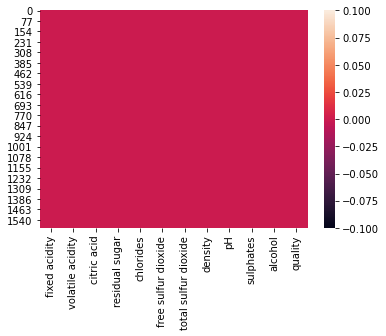

In [152]:
sns.heatmap(df.isnull())

In [153]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [154]:
len(df)

1599

we need to clasify data where 7 or greater quality is good and less than 7 is not good

In [155]:
df['class']=[1 if x>=7 else 0 for x in df['quality']]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [156]:
df['class'].value_counts()

0    1382
1     217
Name: class, dtype: int64

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

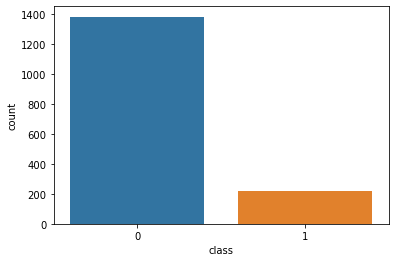

In [157]:
sns.countplot(df['class'])

we can see that the data is highly unbalanced

fixed acidity              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
volatile acidity        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
citric acid             AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
residual sugar          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chlorides               AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
free sulfur dioxide     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
total sulfur dioxide    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
density                       AxesSubplot(0.125,0.125;0.0945122x0.343182)
pH                         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
sulphates                  AxesSubplot(0.351829,0.125;0.0945122x0.343182)
alcohol                    AxesSubplot(0.465244,0.125;0.0945122x0.343182)
quality                    AxesSubplot(0.578659,0.125;0.0945122x0.343182)
class                      AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

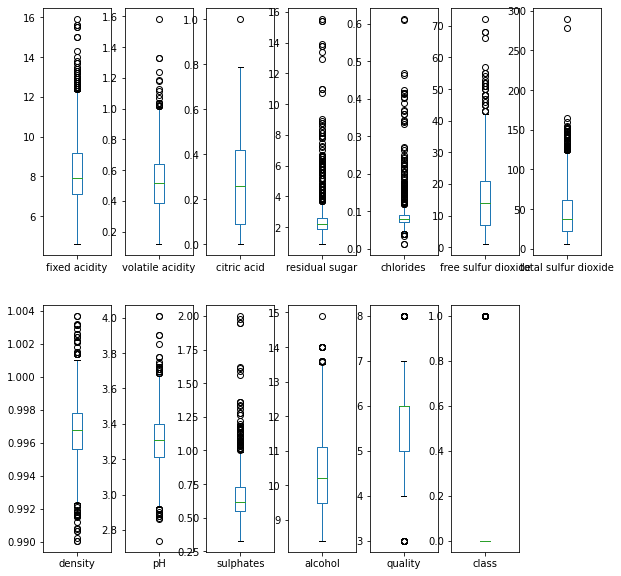

In [158]:
df.plot(kind='box',subplots=True,layout=(2,7),figsize=(10,10))

there are some outliers present in the data

In [159]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

# DATA CLEANSING

Removing outliers

In [160]:
from scipy.stats import zscore

In [161]:
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.96024611, 0.78782264,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.58477711, 0.78782264,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.58477711, 0.78782264,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54162988, 0.45084835,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.20930812, 0.78782264,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.54162988, 0.45084835,
        0.39625599]])

In [162]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [163]:
z[13][9]

5.32210116796055

In [164]:
df1=df[(z<3).all(axis=1)]
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [165]:
df.shape

(1599, 13)

In [166]:
df1.shape

(1451, 13)

data loss percentage

In [167]:
loss_percent=(1500-1451)/1599*100
loss_percent

3.0644152595372107

In [168]:
Q1 = df1.quantile(q=.25)
Q3 = df1.quantile(q=.75)
IQR = Q3-Q1

# Keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
clean_df = df1[~((df1 < (Q1-1.5*IQR)) | (df1 > (Q3+1.5*IQR))).any(axis=1)]

#check the number of columns left
clean_df.shape

(1008, 13)

In [169]:
(1599-1008)/1599*100

36.96060037523452

MORE THAN 10 % DATA LOSS BY USING IQR METHOD

fixed acidity              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
volatile acidity        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
citric acid             AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
residual sugar          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chlorides               AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
free sulfur dioxide     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
total sulfur dioxide    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
density                       AxesSubplot(0.125,0.125;0.0945122x0.343182)
pH                         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
sulphates                  AxesSubplot(0.351829,0.125;0.0945122x0.343182)
alcohol                    AxesSubplot(0.465244,0.125;0.0945122x0.343182)
quality                    AxesSubplot(0.578659,0.125;0.0945122x0.343182)
class                      AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

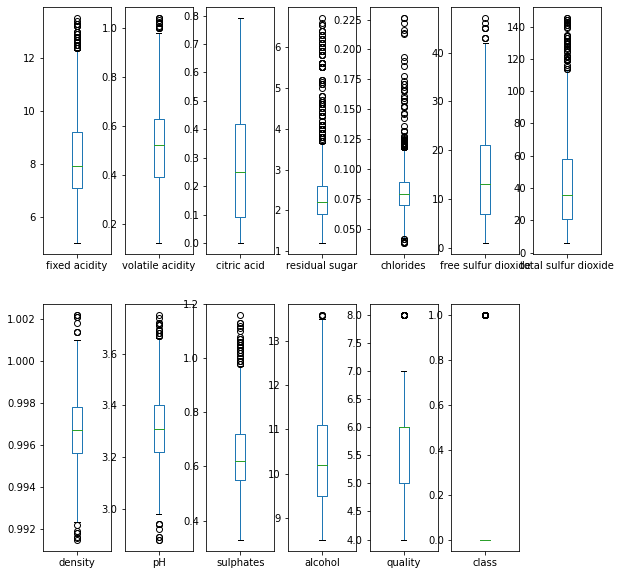

In [170]:
df1.plot(kind='box',subplots=True,layout=(2,7),figsize=(10,10))

there are still some outliers present in the dataset after removing outliers

we will again apply the zscore to df1 and remove and check the data loss

if the data loss is more than 10% we will take df1 as our primary Dataset

In [171]:
z=np.abs(zscore(df1))
z

array([[0.55292997, 1.05091371, 1.39039974, ..., 0.99985592, 0.84412477,
        0.40099875],
       [0.3099004 , 2.11933582, 1.39039974, ..., 0.6081737 , 0.84412477,
        0.40099875],
       [0.3099004 , 1.40705441, 1.18083057, ..., 0.6081737 , 0.84412477,
        0.40099875],
       ...,
       [1.22126131, 0.07686519, 0.70929993, ..., 0.56687296, 0.43573421,
        0.40099875],
       [1.46429088, 0.72445139, 0.76169222, ..., 0.21649148, 0.84412477,
        0.40099875],
       [1.40353349, 1.26400088, 1.07203802, ..., 0.56687296, 0.43573421,
        0.40099875]])

In [172]:
threshold=3
print(np.where(z>3))

(array([   9,   11,   29,   32,   33,   68,   75,   77,  104,  107,  111,
        120,  127,  128,  129,  130,  134,  157,  158,  169,  183,  187,
        240,  241,  244,  254,  263,  267,  268,  273,  286,  308,  318,
        318,  320,  320,  322,  323,  326,  329,  330,  331,  357,  362,
        364,  364,  364,  389,  402,  422,  426,  426,  427,  427,  444,
        445,  446,  447,  452,  463,  463,  464,  479,  480,  482,  489,
        493,  493,  496,  501,  503,  504,  554,  555,  564,  566,  573,
        577,  581,  591,  602,  604,  612,  612,  625,  625,  658,  687,
        688,  689,  690,  694,  721,  744,  761,  791,  810,  811,  822,
        843,  876,  937,  970,  972,  973,  987,  989,  991, 1002, 1017,
       1017, 1022, 1023, 1036, 1037, 1045, 1047, 1063, 1077, 1079, 1089,
       1114, 1156, 1204, 1238, 1253, 1265, 1266, 1268, 1271, 1277, 1284,
       1299, 1304, 1308, 1330, 1332, 1336, 1337, 1430], dtype=int64), array([ 3,  3,  3,  3,  3,  9,  6,  8,  4,  6,  1,  6

In [173]:
df2=df1[(z<3).all(axis=1)]
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [174]:
loss_percent2=(1599-1322)/1599*100
loss_percent2

17.32332707942464

As the dataloss is more than 10% hence we will use df1 with data loss of only 3.5%

In [175]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [176]:
df1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
fixed acidity,1.000000,-0.297150,0.698363,0.180293,0.183549,-0.148815,-0.099928,0.659927,-0.705572,0.200371,-0.015114,0.145163,0.125791
volatile acidity,-0.297150,1.000000,-0.589452,0.025977,0.072709,0.013943,0.110338,-0.004957,0.251343,-0.348126,-0.213213,-0.353443,-0.267836
citric acid,0.698363,-0.589452,1.000000,0.184960,0.100361,-0.074441,0.005301,0.371729,-0.520311,0.302815,0.168766,0.243999,0.227633
residual sugar,0.180293,0.025977,0.184960,1.000000,0.126735,-0.000844,0.095093,0.344801,-0.075140,0.076129,0.162533,0.061482,0.117036
chlorides,0.183549,0.072709,0.100361,0.126735,1.000000,-0.058163,0.045025,0.328695,-0.182841,0.022107,-0.205414,-0.108787,-0.112080
free sulfur dioxide,-0.148815,0.013943,-0.074441,-0.000844,-0.058163,1.000000,0.660188,-0.037630,0.108831,0.055956,-0.077993,-0.071202,-0.086402
total sulfur dioxide,-0.099928,0.110338,0.005301,0.095093,0.045025,0.660188,1.000000,0.118965,-0.005940,-0.039024,-0.259952,-0.237745,-0.172638
density,0.659927,-0.004957,0.371729,0.344801,0.328695,-0.037630,0.118965,1.000000,-0.312310,0.129896,-0.468312,-0.167568,-0.153031
pH,-0.705572,0.251343,-0.520311,-0.075140,-0.182841,0.108831,-0.005940,-0.312310,1.000000,-0.039082,0.135624,-0.082164,-0.079105
sulphates,0.200371,-0.348126,0.302815,0.076129,0.022107,0.055956,-0.039024,0.129896,-0.039082,1.000000,0.241636,0.386567,0.310432


<AxesSubplot:>

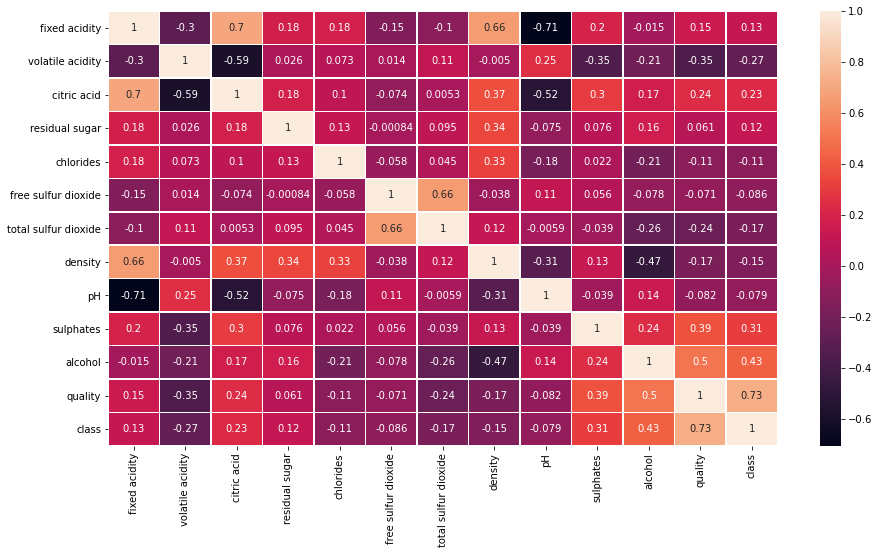

In [177]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True,linewidth=0.5)

checking columns ph,density,free sulphur dioxide,chlorides,residual sugar and fixed acidity with respect to our target column(class) using barplot

they have the least correlation with class so we need to cross check before dropping

<AxesSubplot:xlabel='class', ylabel='residual sugar'>

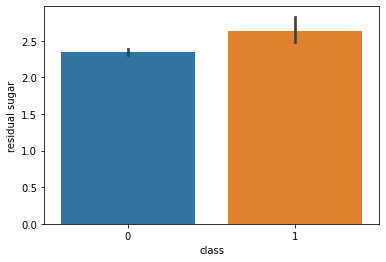

In [178]:
sns.barplot(x='class',y='residual sugar',data=df1)

<AxesSubplot:xlabel='class', ylabel='fixed acidity'>

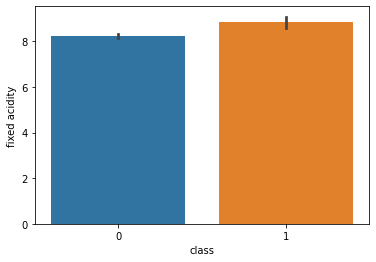

In [179]:
sns.barplot(x='class',y='fixed acidity',data=df1)

<AxesSubplot:xlabel='class', ylabel='citric acid'>

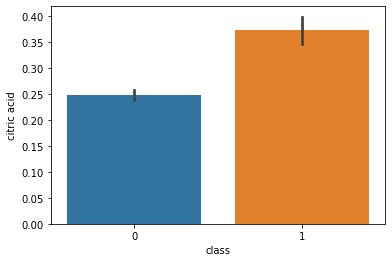

In [180]:
sns.barplot(x='class',y='citric acid',data=df1)

<AxesSubplot:xlabel='class', ylabel='density'>

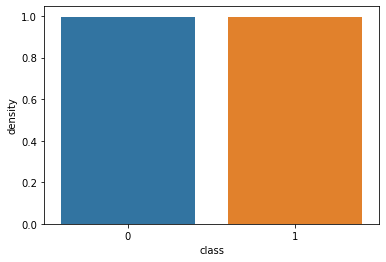

In [181]:
sns.barplot(x='class',y='density',data=df1)

<AxesSubplot:xlabel='class', ylabel='free sulfur dioxide'>

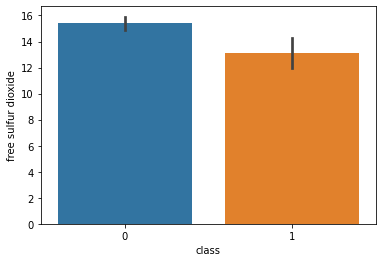

In [182]:
sns.barplot(x='class',y='free sulfur dioxide',data=df1)

<AxesSubplot:xlabel='class', ylabel='pH'>

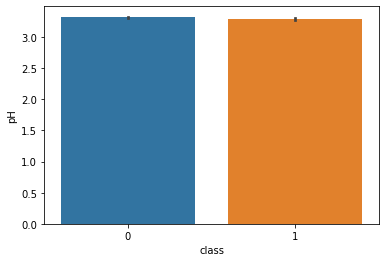

In [183]:
sns.barplot(x='class',y='pH',data=df1)

1) what we found out is PH and density column is not helping us with classifying whether the wine is good or bad

2) free sulfur dioxide and chlorides are with the least correlation in this dataset so we can consider droping them

3) dropping quality column 

In [184]:
df2=df1.drop(['free sulfur dioxide','pH','density','chlorides','quality'],axis=1)

In [185]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,sulphates,alcohol,class
0,7.4,0.700,0.00,1.9,34.0,0.56,9.4,0
1,7.8,0.880,0.00,2.6,67.0,0.68,9.8,0
2,7.8,0.760,0.04,2.3,54.0,0.65,9.8,0
3,11.2,0.280,0.56,1.9,60.0,0.58,9.8,0
4,7.4,0.700,0.00,1.9,34.0,0.56,9.4,0
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,44.0,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,51.0,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,40.0,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,44.0,0.71,10.2,0


# Checking skewness

In [186]:
df2.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
total sulfur dioxide    1.183161
sulphates               0.891492
alcohol                 0.758958
class                   2.094941
dtype: float64

In [187]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,sulphates,alcohol,class
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,43.735355,0.642584,10.421089,0.138525
std,1.646458,0.168531,0.190934,0.862078,29.441284,0.129801,1.021588,0.345569
min,5.000000,0.120000,0.000000,1.200000,6.000000,0.330000,8.500000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,21.000000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,36.000000,0.620000,10.200000,0.000000
75%,9.200000,0.630000,0.420000,2.600000,58.000000,0.720000,11.100000,0.000000
max,13.500000,1.040000,0.790000,6.700000,145.000000,1.160000,13.600000,1.000000


C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

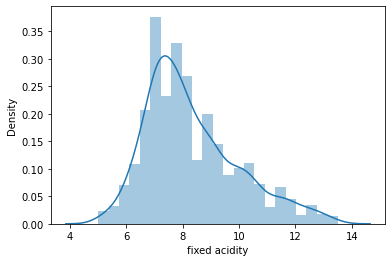

In [188]:
sns.distplot(df2['fixed acidity'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

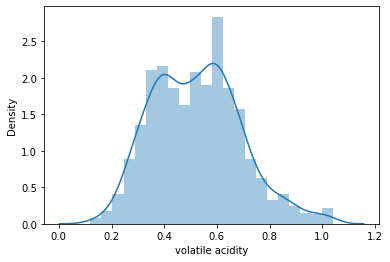

In [189]:
sns.distplot(df2['volatile acidity'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

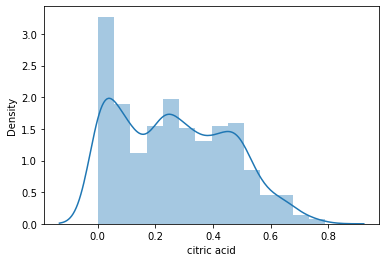

In [190]:
sns.distplot(df2['citric acid'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

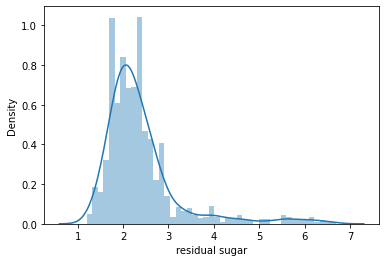

In [191]:
sns.distplot(df2['residual sugar'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

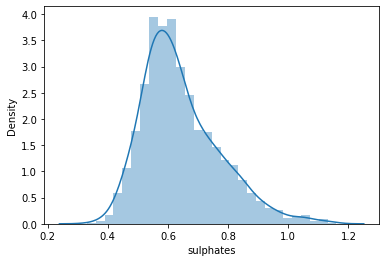

In [192]:
sns.distplot(df2['sulphates'])

so there is skewness present in almost every column

# balancing the dataset

In [193]:
dfx=df2.iloc[:,0:-1]
dfy=df2.iloc[:,-1]

In [194]:
dfx

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,0.00,1.9,34.0,0.56,9.4
1,7.8,0.880,0.00,2.6,67.0,0.68,9.8
2,7.8,0.760,0.04,2.3,54.0,0.65,9.8
3,11.2,0.280,0.56,1.9,60.0,0.58,9.8
4,7.4,0.700,0.00,1.9,34.0,0.56,9.4
...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,44.0,0.58,10.5
1595,5.9,0.550,0.10,2.2,51.0,0.76,11.2
1596,6.3,0.510,0.13,2.3,40.0,0.75,11.0
1597,5.9,0.645,0.12,2.0,44.0,0.71,10.2


In [195]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
x,y=sm.fit_resample(dfx,dfy)

In [196]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,34.000000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,67.000000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,54.000000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,60.000000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,34.000000,0.560000,9.400000
...,...,...,...,...,...,...,...
2495,8.236253,0.443523,0.249776,1.752749,15.527495,0.834949,11.114257
2496,5.558051,0.827767,0.045805,1.425169,87.832205,0.830068,12.900000
2497,10.771735,0.342827,0.497173,2.153105,10.000000,0.745589,11.322055
2498,6.785508,0.471481,0.209952,2.385669,36.428343,0.735701,11.642674


In [197]:
df3=x.copy()

In [198]:
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,34.000000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,67.000000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,54.000000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,60.000000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,34.000000,0.560000,9.400000
...,...,...,...,...,...,...,...
2495,8.236253,0.443523,0.249776,1.752749,15.527495,0.834949,11.114257
2496,5.558051,0.827767,0.045805,1.425169,87.832205,0.830068,12.900000
2497,10.771735,0.342827,0.497173,2.153105,10.000000,0.745589,11.322055
2498,6.785508,0.471481,0.209952,2.385669,36.428343,0.735701,11.642674


In [199]:
y.value_counts()

1    1250
0    1250
Name: class, dtype: int64

now the data is balanced

# removing skewness

In [200]:
from sklearn.preprocessing import power_transform

df3=power_transform(df3,method=('yeo-johnson'))
df3

array([[-0.62122537,  1.33809641, -1.64712865, ...,  0.18106899,
        -0.98646219, -1.42033613],
       [-0.34785558,  2.03998607, -1.64712865, ...,  1.16204208,
         0.01750606, -0.99584796],
       [-0.34785558,  1.59205414, -1.43429528, ...,  0.85454063,
        -0.21903389, -0.99584796],
       ...,
       [ 1.29802163, -0.78820809,  0.97159343, ..., -1.66382681,
         0.50478921,  0.43787546],
       [-1.07388354,  0.12694077, -0.53454884, ...,  0.28263093,
         0.43381411,  0.70852833],
       [-1.00387694,  1.50834138, -1.2025811 , ...,  0.67960595,
        -0.65072392,  1.09963583]])

# feature scaling

In [201]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df3=sc.fit_transform(df3)
df3

array([[-0.62122537,  1.33809641, -1.64712865, ...,  0.18106899,
        -0.98646219, -1.42033613],
       [-0.34785558,  2.03998607, -1.64712865, ...,  1.16204208,
         0.01750606, -0.99584796],
       [-0.34785558,  1.59205414, -1.43429528, ...,  0.85454063,
        -0.21903389, -0.99584796],
       ...,
       [ 1.29802163, -0.78820809,  0.97159343, ..., -1.66382681,
         0.50478921,  0.43787546],
       [-1.07388354,  0.12694077, -0.53454884, ...,  0.28263093,
         0.43381411,  0.70852833],
       [-1.00387694,  1.50834138, -1.2025811 , ...,  0.67960595,
        -0.65072392,  1.09963583]])

In [202]:
df4=pd.DataFrame(df3)
df4

,0,1,2,3,4,5,6
0,-0.621225,1.338096,-1.647129,-0.682804,0.181069,-0.986462,-1.420336
1,-0.347856,2.039986,-1.647129,0.592214,1.162042,0.017506,-0.995848
2,-0.347856,1.592054,-1.434295,0.148368,0.854541,-0.219034,-0.995848
3,1.492788,-1.320038,1.298941,-0.682804,1.005280,-0.807936,-0.995848
4,-0.621225,1.338096,-1.647129,-0.682804,0.181069,-0.986462,-1.420336
...,...,...,...,...,...,...,...
2495,-0.066570,-0.054663,-0.324698,-1.088326,-0.994505,1.109605,0.257140
2496,-2.125334,1.854044,-1.403443,-2.284072,1.541692,1.078176,1.683814
2497,1.298022,-0.788208,0.971593,-0.118834,-1.663827,0.504789,0.437875
2498,-1.073884,0.126941,-0.534549,0.287749,0.282631,0.433814,0.708528


In [203]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: class, Length: 2500, dtype: int64

# Predicting data

checking if we can further reduce the column

In [204]:
for i in range(0,7):
    pca=PCA(n_components=i)
    prin=pca.fit_transform(df3)
    print(i,sum(pca.explained_variance_ratio_))

0 0
1 0.3774116135726257
2 0.5611315973650541
3 0.7095355603481384
4 0.8524291821365729
5 0.923148147849397
6 0.9772393674278645


code for finding the best random state

In [221]:
lg=LogisticRegression()

for i in range(10,200):
    xtrain,xtest,ytrain,ytest=train_test_split(df3,y,test_size=0.20,random_state=i)
    lg.fit(xtrain,ytrain)
    pred_train=lg.predict(xtrain)
    pred_test=lg.predict(xtest)
    if round(accuracy_score(ytrain,pred_train)*100,1)==round(accuracy_score(ytest,pred_test)*100,1):
        print('At random state :- ',i)
        print('training score is :',accuracy_score(ytrain,pred_train)*100)
        print('testing score is :',accuracy_score(ytest,pred_test)*100)
        print('\n')

At random state :-  47
training score is : 81.8
testing score is : 81.8


At random state :-  56
training score is : 81.85
testing score is : 81.8


At random state :-  59
training score is : 82.05
testing score is : 82.0


At random state :-  70
training score is : 82.0
testing score is : 82.0


At random state :-  81
training score is : 81.95
testing score is : 82.0


At random state :-  89
training score is : 81.45
testing score is : 81.39999999999999


At random state :-  90
training score is : 81.8
testing score is : 81.8


At random state :-  163
training score is : 81.45
testing score is : 81.39999999999999




choosing 181 as random state 

In [206]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier() 
svc=SVC()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()
rd=RidgeClassifier()
sgdc=SGDClassifier()

model=[lg,dtc,knn,rfc,svc,abc,gb,rd,sgdc]

In [214]:
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    predm=m.predict(xtest)
    print('Accuracy score of ',m,'is')
    
    print('\n')

Accuracy score of  LogisticRegression() is
0.83
[[211  48]
 [ 37 204]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       259
           1       0.81      0.85      0.83       241

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Accuracy score of  DecisionTreeClassifier() is
0.898
[[233  26]
 [ 25 216]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       259
           1       0.89      0.90      0.89       241

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



Accuracy score of  KNeighborsClassifier() is
0.916
[[221  38]
 [  4 237]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       259
           1

we got the best score of 95% accuracy with Randomforest we will try to tune it

checking the difference in cv mean and f1 score of top 3 models

In [208]:
score=cross_val_score(rfc,df3,y,cv=5)
print(score)
print(score.mean())

[0.942 0.87  0.936 0.86  0.902]
0.9019999999999999


In [209]:
score=cross_val_score(dtc,df3,y,cv=5)
print(score)
print(score.mean())

[0.854 0.856 0.882 0.808 0.884]
0.8568000000000001


In [210]:
score=cross_val_score(svc,df3,y,cv=5)
print(score)
print(score.mean())

[0.914 0.808 0.878 0.788 0.872]
0.852


we will choose random forest as there is not much difference

# Hypertuning

In [211]:
parameters={"n_estimators":[10,100,500],'criterion':['gini', 'entropy']}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
clf.fit(df3,y)
clf.best_params_

{'criterion': 'gini', 'n_estimators': 500}

In [218]:
xtrain,xtest,ytrain,ytest=train_test_split(df3,y,test_size=0.20,random_state=181)
rfr=RandomForestClassifier(n_estimators=500,criterion='gini')
rfr.fit(xtrain,ytrain)
pred=rfr.predict(xtest)
rfr.score(xtrain,ytrain)

1.0

# saving the model

In [213]:
joblib.dump(rfr,'rfrfile.obj')

['rfrfile.obj']